# Data Processing 

In [1]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = [20, 10]
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
# All variables we concern about
columnNames1 = ["releaseNum", "1968ID", "personNumber", "gender", "marriage", "familyNumber", "sequenceNum", 
               "relationToHead", "age", 'employmentStatus', "education", "nonHeadlaborIncome"]

columnNames2 = ["releaseNum", "1968ID", "personNumber", "gender", "marriage", "familyNumber", "sequenceNum", 
               "relationToHead", "age", 'employmentStatus', "education"]

FcolumnNames1999_2001 = ['releaseNum', 'familyID', 'composition', 'headCount', 'ageHead', 'maritalStatus', 'employmentStatus', 
               'liquidWealth', 'race', 'industry' ,'geoCode','incomeHead', "incomeWife", 
               'foodCost', 'houseCost', 'transCost', 'educationCost', 'childCost', 'healthCost', 'education', 
               'participation', 'investmentAmount', 'annuityIRA', 'wealthWithoutHomeEquity', "wealthWithHomeEquity"]

FcolumnNames2003_2007 = ['releaseNum', 'familyID', 'composition', 'headCount', 'ageHead', 'maritalStatus', 'employmentStatus', 
               'liquidWealth', 'race', 'industry', 'incomeHead', "incomeWife", 
               'foodCost', 'houseCost', 'transCost', 'educationCost', 'childCost', 'healthCost', 'geoCode', 'education', 
               'participation', 'investmentAmount', 'annuityIRA', 'wealthWithoutHomeEquity', "wealthWithHomeEquity"]

FcolumnNames2019 = ['releaseNum', 'familyID', 'composition', 'headCount', 'ageHead', 'maritalStatus', 'employmentStatus', 
               'liquidWealth', 'race', 'industry' ,'incomeHead', 'incomeWife', 
               'participation', 'investmentAmount', 'annuityIRA', 'wealthWithoutHomeEquity', 'wealthWithHomeEquity',
               'foodCost', 'houseCost', 'transCost', 'educationCost', 'childCost', 'healthCost', 'geoCode', 'education']
# The timeline we care about
years = [1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017]

# The function used to complile all years data into one dataFrame, 
# the input "features" is a list of features.
def compile_data_with_features(features, years):
    df = pd.DataFrame()
    # Loading the data through years
    for year in years:
        df_sub = pd.read_excel("individual/" + str(year) + ".xlsx")
        if year >= 2005:
            df_sub.columns = columnNames1
            df_sub['year'] = year
            df = pd.concat([df, df_sub[['year'] + features + ["nonHeadlaborIncome"]]])
        else:
            df_sub.columns = columnNames2
            df_sub['year'] = year
            df = pd.concat([df, df_sub[['year'] + features]])
    df = df.reset_index(drop = True)
    return df

def Fcompile_data_with_features(features, years):
    df = pd.DataFrame()
    # Loading the data through years
    for year in years:
        df_sub = pd.read_excel("family/" + str(year) + ".xlsx")
        if year >= 1999 and year <= 2001:
            df_sub.columns = FcolumnNames1999_2001
        elif year >= 2003 and year <= 2007:
            df_sub.columns = FcolumnNames2003_2007
        else:
            df_sub.columns = FcolumnNames2019
        df_sub['year'] = year
        df = pd.concat([df, df_sub[['familyID','year'] + features]])
    df = df.reset_index(drop = True)
    return df

# The function is used to drop the values we do not like in the dataFrame, 
# the input "features" and "values" are both list
def drop_values(features, values, df): 
    for feature in features:
        for value in values:
            df = df[df[feature] != value]
    df = df.reset_index(drop = True)
    return df

### Individual Data

In [3]:
Idf = compile_data_with_features(["1968ID", "personNumber", "familyNumber","gender", "marriage", 
                                  "age", 'employmentStatus', "education", "relationToHead"], years)
Idf["ID"] = Idf["1968ID"]* 1000 + Idf["personNumber"]
# pick out the head in the individual
df_head = Idf[Idf["relationToHead"] == 10]
df_head = df_head.reset_index(drop = True)
# compile individuals with all 10 years data.
completeIndividualData = []
for ID, value in df_head.groupby("ID"):
    if len(value) == len(years):
        completeIndividualData.append(value)
print("Number of heads with complete data: ", len(completeIndividualData))

Number of heads with complete data:  3074


### Family Data

In [4]:
# prepare the combined dataset and set up dummy variables for qualitative data
df = Fcompile_data_with_features(['composition', 'headCount', 'ageHead', 'maritalStatus', 'employmentStatus', 
                                   'liquidWealth', 'race', 'industry' ,'geoCode','incomeHead', "incomeWife", 
                                   'foodCost', 'houseCost', 'transCost', 'educationCost', 'childCost', 
                                 'healthCost', 'education', 'participation', 'investmentAmount', 'annuityIRA', 
                                 'wealthWithoutHomeEquity', "wealthWithHomeEquity"], years)

In [5]:
df.shape

(83831, 25)

In [6]:
df.groupby("year").count()

,familyID,composition,headCount,ageHead,maritalStatus,employmentStatus,liquidWealth,race,industry,geoCode,...,transCost,educationCost,childCost,healthCost,education,participation,investmentAmount,annuityIRA,wealthWithoutHomeEquity,wealthWithHomeEquity
year,,,,,,,,,,,,,,,,,,,,,
1999,6997,6997,6997,6997,6997,6997,6997,6997,6997,6997,...,6997,6997,6997,6997,6997,6997,6997,6997,6997,6997
2001,7406,7406,7406,7406,7406,7406,7406,7406,7406,7406,...,7406,7406,7406,7406,7406,7406,7406,7406,7406,7406
2003,7822,7822,7822,7822,7822,7822,7822,7822,7822,7822,...,7822,7822,7822,7822,7822,7822,7822,7822,7822,7822
2005,8002,8002,8002,8002,8002,8002,8002,8002,8002,8002,...,8002,8002,8002,8002,8002,8002,8002,8002,8002,8002
2007,8289,8289,8289,8289,8289,8289,8289,8289,8289,8289,...,8289,8289,8289,8289,8289,8289,8289,8289,8289,8289
2009,8690,8690,8690,8690,8690,8690,8690,8690,8690,8690,...,8690,8690,8690,8690,8690,8690,8690,8690,8690,8690
2011,8907,8907,8907,8907,8907,8907,8907,8907,8907,8907,...,8907,8907,8907,8907,8907,8907,8907,8907,8907,8907
2013,9063,9063,9063,9063,9063,9063,9063,9063,9063,9063,...,9063,9063,9063,9063,9063,9063,9063,9063,9063,9063
2015,9048,9048,9048,9048,9048,9048,9048,9048,9048,9048,...,9048,9048,9048,9048,9048,9048,9048,9048,9048,9048


In [7]:
df = drop_values(["ageHead"],[999], df)
df = drop_values(["maritalStatus"],[8,9], df)
df = drop_values(["employmentStatus"],[0, 22, 98, 99], df)
df = drop_values(["liquidWealth"],[999999998,999999999], df)
df = drop_values(["race"],[0,8,9], df)
df = drop_values(["industry"],[999,0], df)
df = drop_values(["education"],[99,0], df)
df["totalExpense"] = df[['foodCost', 'houseCost', 'transCost', 
                                      'educationCost', 'childCost', 'healthCost']].sum(axis = 1)
df["laborIncome"] = df["incomeHead"] + df["incomeWife"]
df["costPerPerson"] = df["totalExpense"]/df["headCount"]



maritalStatus = ["Married", "neverMarried", "Widowed", "Divorced", "Separated"]
employmentStatus = ["Working", "temporalLeave", "unemployed", "retired", "disabled", "keepHouse", "student", "other"]
race = ["White", "Black","AmericanIndian","Asian","Latino","otherBW","otherRace"]
# Education
# < 8th grade: middle school
# >= 8 and < 12: high scho0l
# >=12 and < 15: college
# >= 15 post graduate
education = ["middleSchool", "highSchool", "college", "postGraduate"]
# Industry
# < 400 manufacturing
# >= 400 and < 500 publicUtility
# >= 500 and < 680 retail 
# >= 680 and < 720 finance
# >= 720 and < 900 service
# >= 900 otherIndustry
industry = ["manufacturing", "publicUtility", "retail", "finance", "service", "otherIndustry"]
data = []
for i in range(len(df)):
    dataCollect = []
    # marital status
    dataCollect.append(maritalStatus[int(df.iloc[i]["maritalStatus"]-1)])
    # employment
    dataCollect.append(employmentStatus[int(df.iloc[i]["employmentStatus"]-1)])
    # race
    dataCollect.append(race[int(df.iloc[i]["race"] - 1)])
    # Education variable 
    if df.iloc[i]["education"] < 8:
        dataCollect.append(education[0])
    elif df.iloc[i]["education"] >= 8 and df.iloc[i]["education"] < 12:
        dataCollect.append(education[1])
    elif df.iloc[i]["education"] >= 12 and df.iloc[i]["education"] < 15:
        dataCollect.append(education[2])
    else:
        dataCollect.append(education[3])
    # industry variable 
    if df.iloc[i]["industry"] < 400:
        dataCollect.append(industry[0])
    elif df.iloc[i]["industry"] >= 400 and df.iloc[i]["industry"] < 500:
        dataCollect.append(industry[1])
    elif df.iloc[i]["industry"] >= 500 and df.iloc[i]["industry"] < 680:
        dataCollect.append(industry[2])
    elif df.iloc[i]["industry"] >= 680 and df.iloc[i]["industry"] < 720:
        dataCollect.append(industry[3])
    elif df.iloc[i]["industry"] >= 720 and df.iloc[i]["industry"] < 900:
        dataCollect.append(industry[4])
    else:
        dataCollect.append(industry[5])
    data.append(dataCollect)
# Categorical dataFrame
df_cat = pd.DataFrame(data, columns = ["maritalStatus", "employmentStatus", "race", "education", "industry"])

In [8]:
Fdf = pd.concat([df[["familyID", "year",'composition', 'headCount', 'ageHead', 'liquidWealth', 'laborIncome', 
                     "costPerPerson","totalExpense", 'participation', 'investmentAmount', 'annuityIRA', 
                                 'wealthWithoutHomeEquity', "wealthWithHomeEquity"]], 
                          df_cat[["maritalStatus", "employmentStatus", "education","race", "industry"]]], axis=1)
# Adjust for inflation. 
years = [1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017]
values_at2020 = np.array([1.55, 1.46, 1.40, 1.32, 1.24, 1.20, 1.15, 1.11, 1.09, 1.05])
values_at2005 = values_at2020/1.32
quantVariables = ['annuityIRA', 'investmentAmount', 'liquidWealth', 'laborIncome', 'costPerPerson','costPerPerson',
                 'totalExpense', 'wealthWithoutHomeEquity', 'wealthWithHomeEquity']
for i in range(len(Fdf)):
    for variable in quantVariables:
        Fdf.at[i, variable] = round(Fdf.at[i, variable] * values_at2005[years.index(Fdf.at[i,"year"])], 2)

In [9]:
Fdf.shape

(66608, 19)

In [10]:
Fdf.head()

,familyID,year,composition,headCount,ageHead,liquidWealth,laborIncome,costPerPerson,totalExpense,participation,investmentAmount,annuityIRA,wealthWithoutHomeEquity,wealthWithHomeEquity,maritalStatus,employmentStatus,education,race,industry
0,3,1999,2,1,76,2348,0,8567.62,7296.30,0,0,0,36988,107443,Widowed,retired,middleSchool,White,publicUtility
1,2,1999,0,4,47,0,26138,4896.97,16681.29,1,9393,0,23484,30530,Married,Working,highSchool,White,retail
2,6129,1999,3,1,45,8806,0,19612.21,16702.01,1,8219,19962,447973,485549,Divorced,Working,college,White,finance
3,6944,1999,0,2,39,14090,35227,12081.69,20577.85,0,0,0,31704,49318,Divorced,Working,college,White,manufacturing
4,3818,1999,4,4,34,0,48848,5226.52,17803.86,0,0,0,14090,23484,Married,Working,highSchool,White,manufacturing


### Link Family Data with Individual Head Data

In [11]:
completeFamilyData = []
for individual in completeIndividualData:
    idf = pd.DataFrame()
    for i in range(len(individual)): 
        idf = pd.concat([idf, Fdf[(Fdf.year == individual.iloc[i].year)&
                                (Fdf.familyID == individual.iloc[i].familyNumber)]])
    completeFamilyData.append(idf.set_index("year", drop = True))

In [12]:
FamilyData = [f for f in completeFamilyData if len(f) == len(years)]
len(FamilyData)

1973

In [13]:
# skilled definition with college and postGraduate
skilled_index = []
for i in range(1973):
    if "postGraduate" in FamilyData[i].education.values or "college" in FamilyData[i].education.values:
        skilled_index.append(i)
len(skilled_index)

1747

In [14]:
# skilled definition with postGraduate
skilled_index = []
for i in range(1973):
    if "postGraduate" in FamilyData[i].education.values:
        skilled_index.append(i)
len(skilled_index)

804

In [15]:
# working in the finance industry
finance_index = []
for i in range(1973):
    if "finance" in FamilyData[i].industry.values:
        finance_index.append(i)
len(finance_index)

96

In [16]:
a = FamilyData[randint(0, 1973)]
a

,familyID,composition,headCount,ageHead,liquidWealth,laborIncome,costPerPerson,totalExpense,participation,investmentAmount,annuityIRA,wealthWithoutHomeEquity,wealthWithHomeEquity,maritalStatus,employmentStatus,education,race,industry
year,,,,,,,,,,,,,,,,,,
1999,1577,3,4,35,0,5401,2523.28,8595.45,0,0,0,0,0,Separated,Working,college,Black,manufacturing
2001,257,0,4,37,0,12387,1319.71,4772.65,0,0,0,884,884,Separated,unemployed,college,Black,manufacturing
2003,2507,0,4,39,0,9333,3283.25,12382.58,0,0,0,2863,2863,Separated,unemployed,college,Black,manufacturing
2005,523,0,4,41,20,4930,1195.38,4781.50,0,0,0,3020,3020,Separated,unemployed,college,Black,manufacturing
2007,6742,0,4,43,281,25739,5552.55,23643.14,0,0,0,2160,2160,Separated,Working,college,Black,manufacturing
2009,3276,0,4,45,0,25454,6742.55,29667.24,0,0,0,4545,4545,Separated,Working,college,Black,manufacturing
2011,8551,1,4,47,0,8712,3833.86,17602.41,0,0,0,-11325,-11325,Separated,Working,college,Black,manufacturing
2013,7473,0,4,49,0,18163,3333.84,15858.27,0,0,0,5886,5886,Separated,Working,college,Black,manufacturing
2015,6871,1,3,51,0,20643,3468.51,12601.20,0,0,0,1651,1651,Divorced,Working,college,Black,manufacturing


# Individual plot

In [17]:
def inFeaturePlot(FamilyData, feature, n):
    plt.figure()
    for i in range(n[0],n[1]):
        FamilyData[i][feature].plot(marker='o')
    plt.show()

def plotFeatureVsAge(FamilyData, feature, n):
    plt.figure()
    for i in range(n[0],n[1]):
        plt.plot(FamilyData[i].ageHead, FamilyData[i][feature], marker = 'o')
    plt.show()

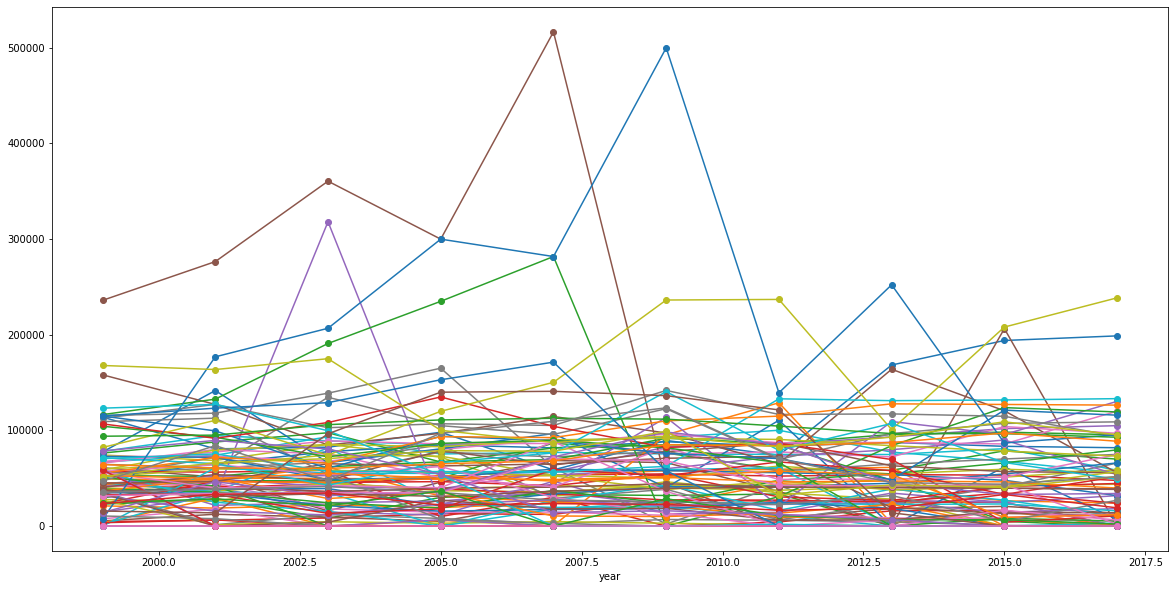

In [18]:
inFeaturePlot(FamilyData,"laborIncome" , [1,100])

# Average variable plot

In [19]:
def plotFeature(FamilyData, feature):
    df = FamilyData[0][feature] * 0
    for i in range(len(FamilyData)):
        df = df + FamilyData[i][feature]
    df = df/len(FamilyData)
    df.plot(marker='o')
    print(df)

year
1999    58515.849468
2001    62096.450076
2003    61631.421186
2005    62050.746072
2007    60616.224024
2009    61723.606183
2011    55187.245819
2013    55558.055246
2015    51013.996452
2017    48526.321338
Name: laborIncome, dtype: float64


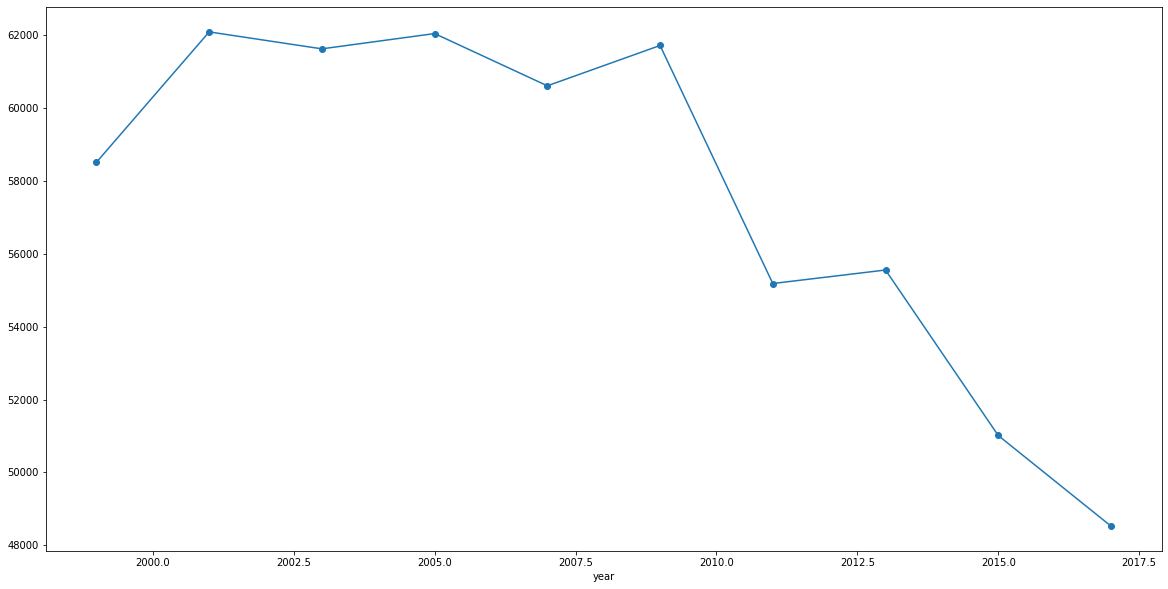

In [20]:
# laborIncome
plotFeature(FamilyData, "laborIncome")

year
1999    44860.393310
2001    62282.585910
2003    58126.453117
2005    55852.234668
2007    62082.949823
2009    50626.348201
2011    56326.484034
2013    72089.909782
2015    74328.152053
2017    85350.660922
Name: investmentAmount, dtype: float64


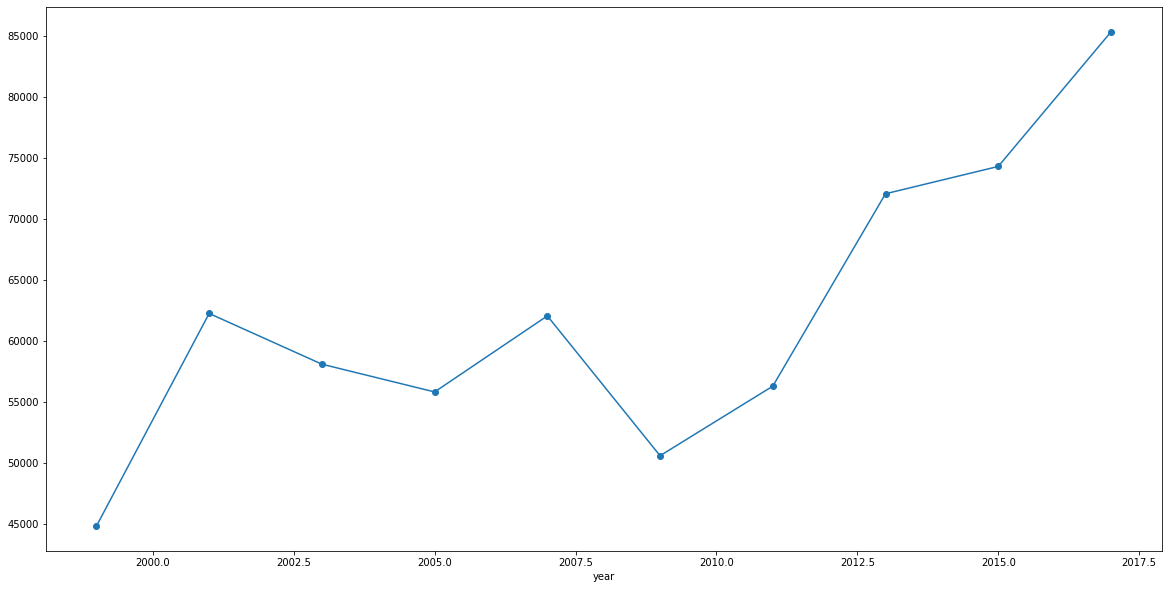

In [21]:
# laborIncome
plotFeature(FamilyData, "investmentAmount")

year
1999    32567.763675
2001    34693.636589
2003    34174.804709
2005    40804.406837
2007    41616.631510
2009    39253.224445
2011    38401.690223
2013    37231.670071
2015    36753.446087
2017    35466.241521
Name: totalExpense, dtype: float64


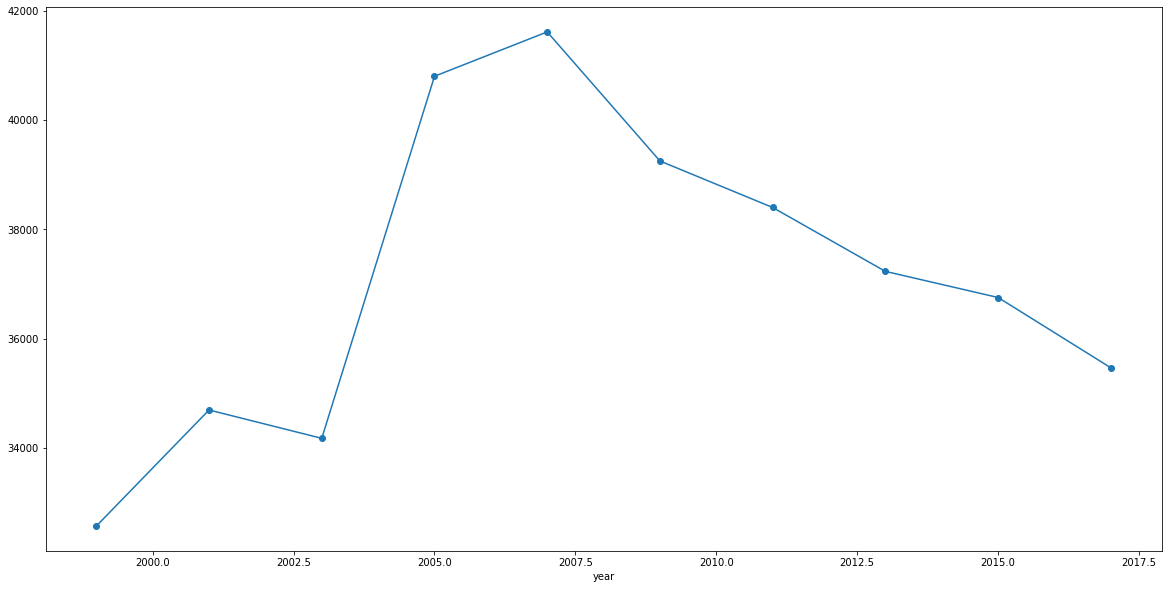

In [22]:
# Expenditure
plotFeature(FamilyData, "totalExpense")

year
1999    189996.335023
2001    209022.036493
2003    215746.606690
2005    240508.410542
2007    294690.792701
2009    265977.239736
2011    264675.113533
2013    263506.552458
2015    319621.413077
2017    325448.128738
Name: wealthWithoutHomeEquity, dtype: float64


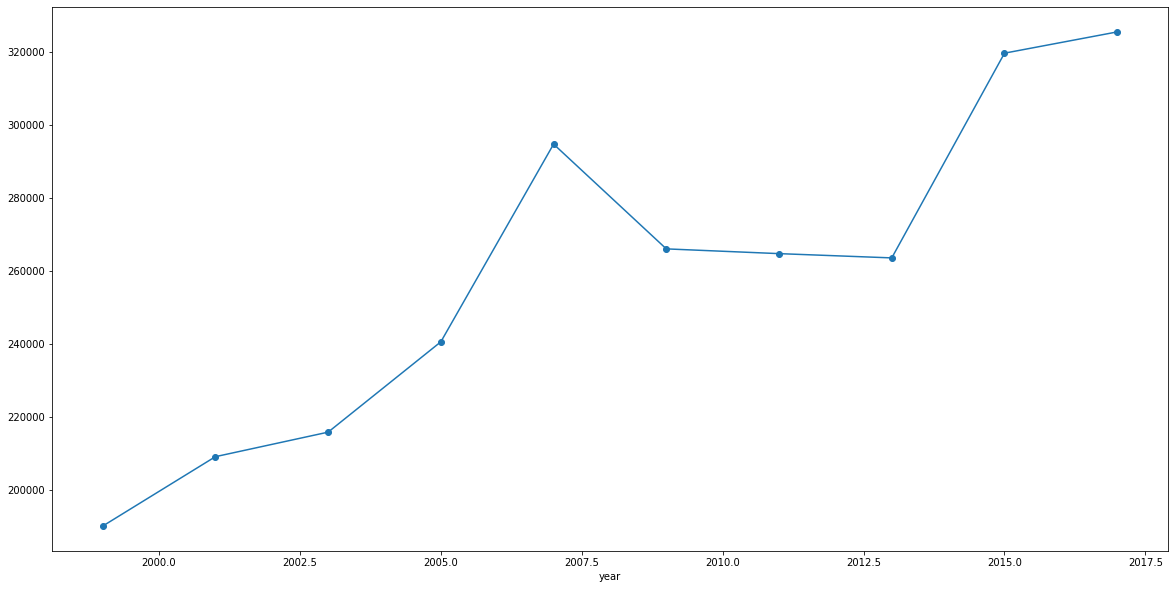

In [23]:
# wealthWithoutHomeEquity
plotFeature(FamilyData, "wealthWithoutHomeEquity")

year
1999    249291.759757
2001    280795.618855
2003    299767.171313
2005    348341.237202
2007    414308.082108
2009    361313.661936
2011    357152.367968
2013    354735.116067
2015    423869.457172
2017    440618.187532
Name: wealthWithHomeEquity, dtype: float64


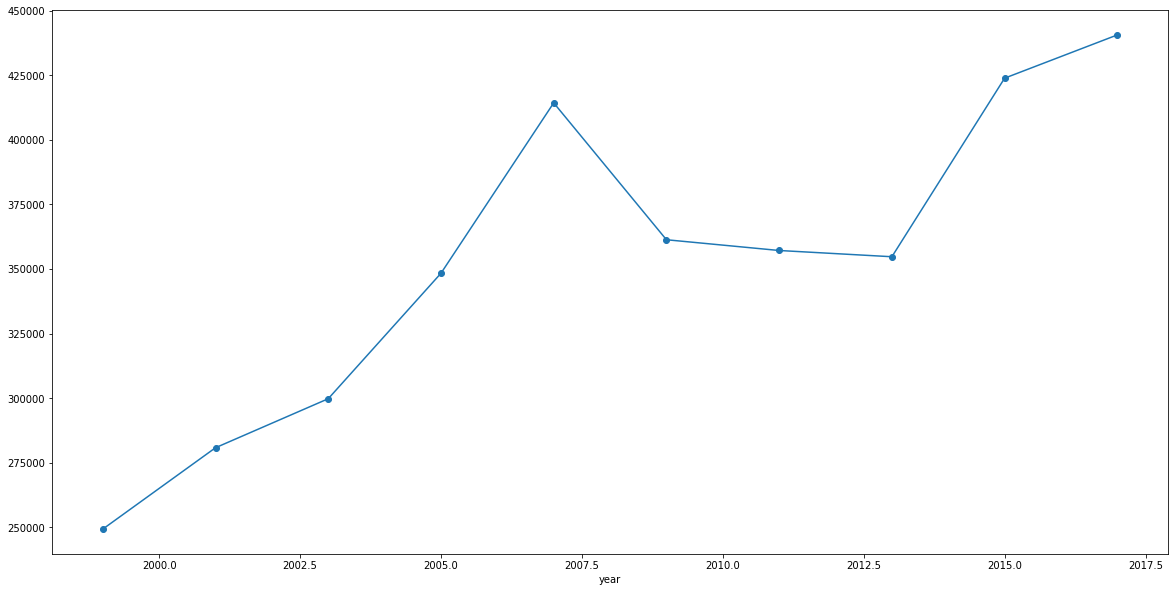

In [24]:
# wealthWithHomeEquity
plotFeature(FamilyData, "wealthWithHomeEquity")

year
1999    31462.509377
2001    34869.478459
2003    31720.994932
2005    40220.458186
2007    50619.510897
2009    41815.880892
2011    62674.657881
2013    65190.544349
2015    78211.521034
2017    84070.374050
Name: annuityIRA, dtype: float64


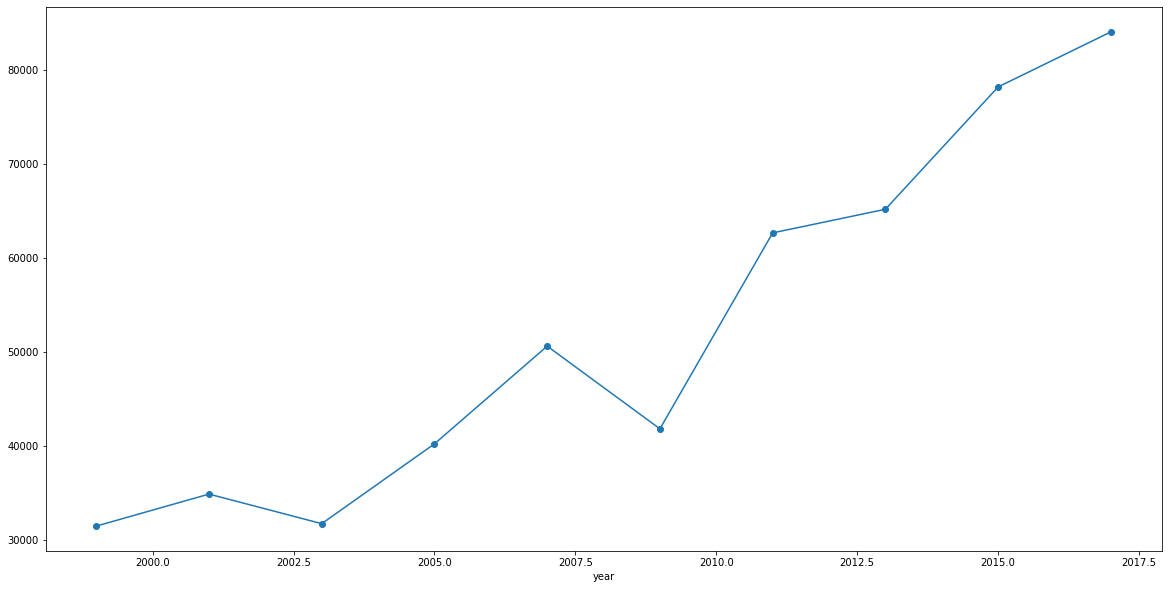

In [25]:
plotFeature(FamilyData, "annuityIRA")

## Compare The Distribution Over Age

In [26]:
df = Fdf[(Fdf["ageHead"]>=20) & (Fdf["ageHead"]<=80)]
df[['liquidWealth', 'laborIncome', 'costPerPerson', 'totalExpense','investmentAmount', 'annuityIRA',
       'wealthWithoutHomeEquity', 'wealthWithHomeEquity']] = df[['liquidWealth', 'laborIncome', 'costPerPerson', 'totalExpense','investmentAmount', 'annuityIRA',
       'wealthWithoutHomeEquity', 'wealthWithHomeEquity']]/1000
df.shape

(64456, 19)

In [27]:
df.columns

Index(['familyID', 'year', 'composition', 'headCount', 'ageHead',
       'liquidWealth', 'laborIncome', 'costPerPerson', 'totalExpense',
       'participation', 'investmentAmount', 'annuityIRA',
       'wealthWithoutHomeEquity', 'wealthWithHomeEquity', 'maritalStatus',
       'employmentStatus', 'education', 'race', 'industry'],
      dtype='object')

In [28]:
ww = df.groupby("ageHead")["liquidWealth"].mean()
nn = df.groupby("ageHead")["annuityIRA"].mean()
cc = df.groupby("ageHead")["totalExpense"].mean()
kk = df.groupby("ageHead")["investmentAmount"].mean()
ytyt = df.groupby("ageHead")["laborIncome"].mean()

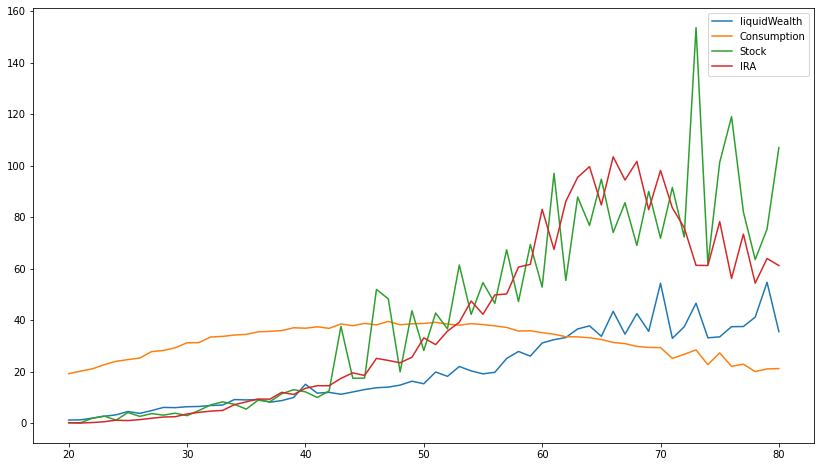

In [29]:
plt.figure(figsize = [14,8])
plt.plot(ww, label = "liquidWealth")
plt.plot(cc, label = "Consumption")
plt.plot(kk, label = "Stock")
plt.plot(nn, label = "IRA")
plt.legend()

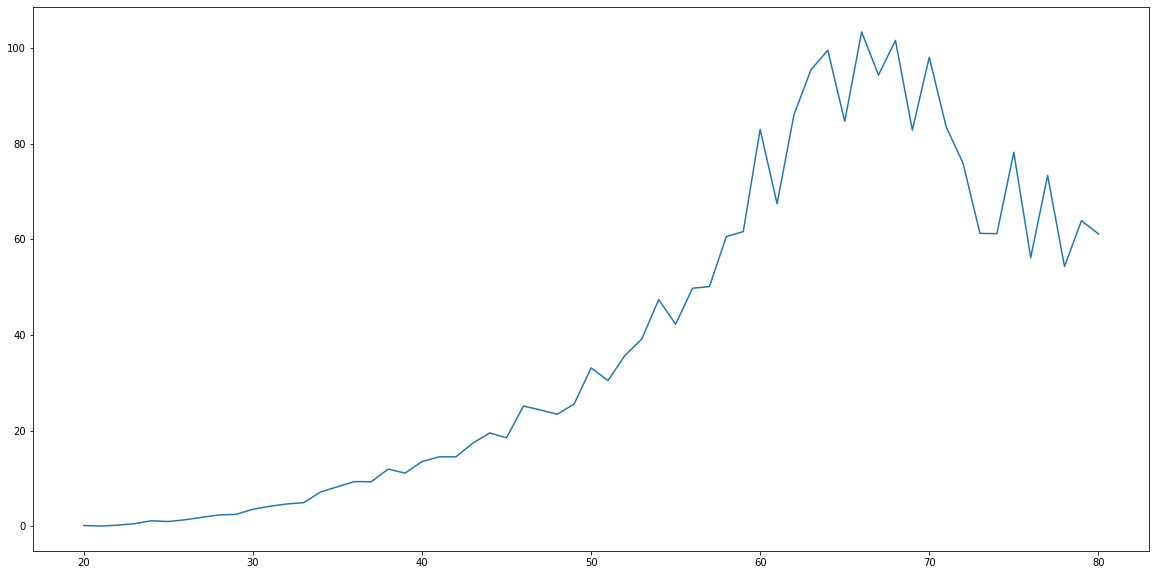

In [30]:
plt.plot(nn, label = "IRA")

In [31]:
np.save('nn',nn)

In [32]:
plt.style.use('ggplot')

In [33]:
Fdf.head(10)

,familyID,year,composition,headCount,ageHead,liquidWealth,laborIncome,costPerPerson,totalExpense,participation,investmentAmount,annuityIRA,wealthWithoutHomeEquity,wealthWithHomeEquity,maritalStatus,employmentStatus,education,race,industry
0,3,1999,2,1,76,2348,0,8567.62,7296.30,0,0,0,36988,107443,Widowed,retired,middleSchool,White,publicUtility
1,2,1999,0,4,47,0,26138,4896.97,16681.29,1,9393,0,23484,30530,Married,Working,highSchool,White,retail
2,6129,1999,3,1,45,8806,0,19612.21,16702.01,1,8219,19962,447973,485549,Divorced,Working,college,White,finance
3,6944,1999,0,2,39,14090,35227,12081.69,20577.85,0,0,0,31704,49318,Divorced,Working,college,White,manufacturing
4,3818,1999,4,4,34,0,48848,5226.52,17803.86,0,0,0,14090,23484,Married,Working,highSchool,White,manufacturing
5,5478,1999,0,2,23,0,7045,8526.78,14523.03,0,0,0,3522,3522,neverMarried,Working,highSchool,White,manufacturing
6,6965,1999,3,2,20,0,23484,14473.40,24651.46,0,0,0,5871,5871,Separated,Working,college,White,retail
7,2122,1999,2,1,50,7045,58712,34394.61,29290.89,1,14090,0,38750,97462,Divorced,Working,postGraduate,White,service
8,2560,1999,0,1,39,3522,42272,13375.49,11390.74,1,7750,4696,22428,128109,Divorced,Working,college,White,manufacturing
9,6906,1999,0,3,55,23484,70454,12856.39,32846.00,0,0,234848,466174,571856,Married,retired,college,White,publicUtility


<AxesSubplot:xlabel='ageHead'>

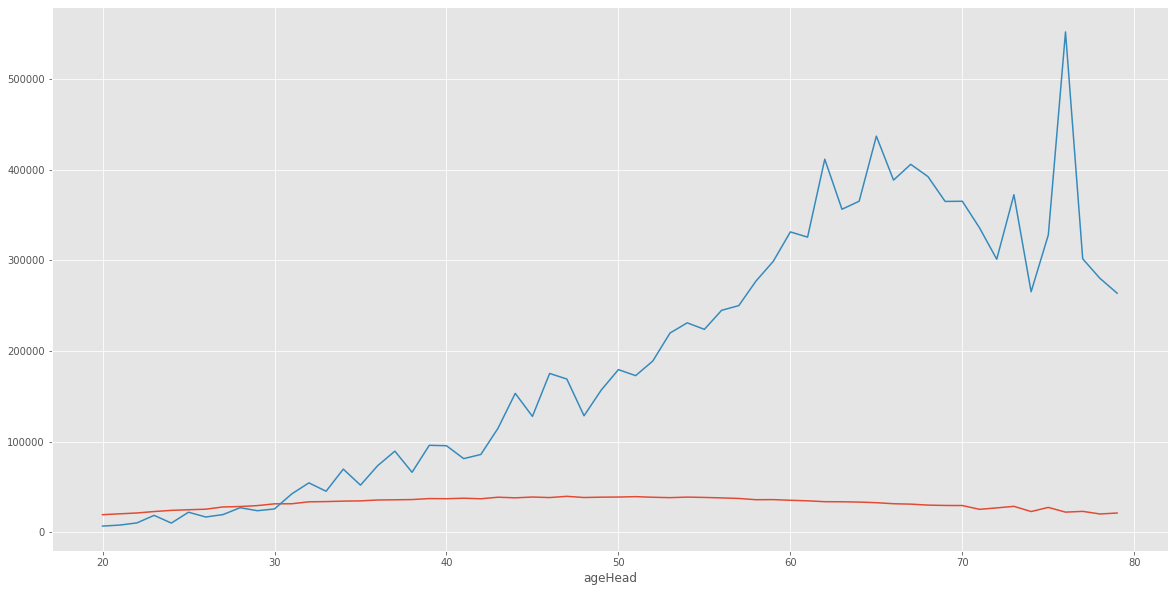

In [34]:
Fdf.groupby("ageHead").totalExpense.mean()[2:62].plot()
Fdf.groupby("ageHead").wealthWithoutHomeEquity.mean()[2:62].plot()

<AxesSubplot:xlabel='ageHead'>

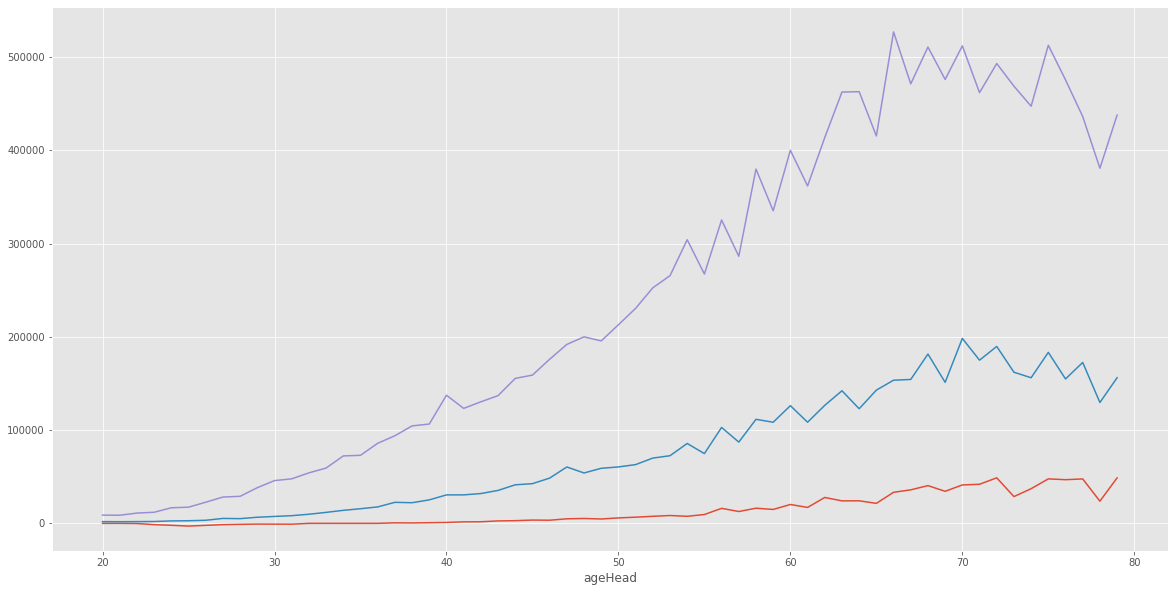

In [35]:
Fdf.groupby("ageHead").wealthWithHomeEquity.quantile(0.25)[2:62].plot()
Fdf.groupby("ageHead").wealthWithHomeEquity.quantile(0.5)[2:62].plot()
Fdf.groupby("ageHead").wealthWithHomeEquity.quantile(0.75)[2:62].plot()

<AxesSubplot:xlabel='ageHead'>

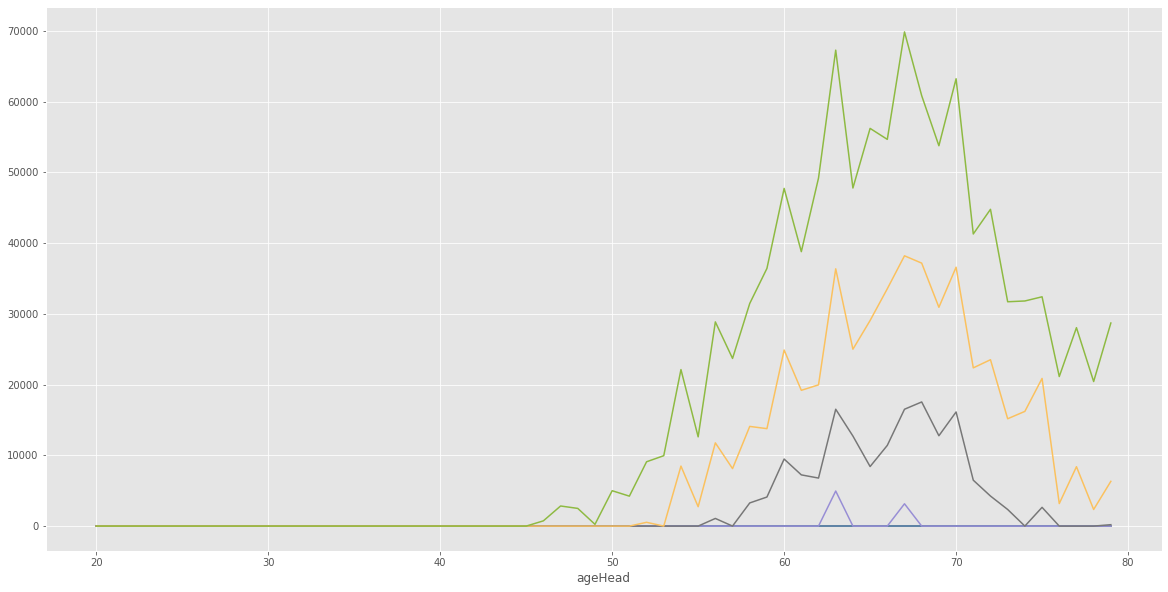

In [36]:
# Fdf.groupby("ageHead").annuityIRA.quantile(0.25)[2:62].plot()
# Fdf.groupby("ageHead").annuityIRA.quantile(0.5)[2:62].plot()
Fdf.groupby("ageHead").annuityIRA.quantile(0.50)[2:62].plot()
Fdf.groupby("ageHead").annuityIRA.quantile(0.55)[2:62].plot()
Fdf.groupby("ageHead").annuityIRA.quantile(0.60)[2:62].plot()
Fdf.groupby("ageHead").annuityIRA.quantile(0.65)[2:62].plot()
Fdf.groupby("ageHead").annuityIRA.quantile(0.70)[2:62].plot()
Fdf.groupby("ageHead").annuityIRA.quantile(0.75)[2:62].plot()